In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from scipy.cluster.hierarchy import ward, linkage, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

import nltk
from nltk.corpus import stopwords  
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

#### Imports required

In [3]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'site',
 'os',
 'sys',
 'pandas',
 'numpy',
 'matplotlib.pyplot',
 'seaborn',
 'nltk',
 'types']

#### Loading the dataset

Read five files in ./data/* and concat them into a single DataFrame

In [4]:
file1 = './data/1/Indiegogo.csv'
file2 = './data/2/Indiegogo.csv'
file3 = './data/3/Indiegogo.csv'
file4 = './data/4/Indiegogo.csv'
file5 = './data/5/Indiegogo.csv'

df = pd.read_csv(file1, low_memory=False)

for i in range(2,6):
    df = pd.concat([df, pd.read_csv('./data/'+str(i)+'/Indiegogo.csv', low_memory=False)])

In [5]:
df.head(2)

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,...,perks_claimed,price_offered,price_retail,product_stage,project_id,project_type,source_url,tagline,tags,title
0,NaN,Local Businesses,/explore/local-businesses,/projects/vigore-vacuum-food-saver-system-fres...,2015-05-09T23:59:59-07:00,USD,727,0.014540,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,NaN,NaN,1091053,campaign,https://www.indiegogo.com/explore/all?project_...,Vigore - Vacuum Food Saver System. Kitchen Tec...,"[""other""]",Vigore - Vacuum Food Saver System. Fresh 3X Lo...
1,NaN,Human Rights,/explore/human-rights,/projects/minnesota-s-moral-injury,2015-10-09T23:59:59-07:00,USD,10715,0.714333,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,NaN,NaN,1401197,campaign,https://www.indiegogo.com/explore/all?project_...,"2,000,000 people worldwide have overcome effec...","[""other""]",Minnesota's Moral Injury


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164317 entries, 0 to 32935
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   bullet_point          790 non-null     object 
 1   category              164317 non-null  object 
 2   category_url          164317 non-null  object 
 3   clickthrough_url      164317 non-null  object 
 4   close_date            163555 non-null  object 
 5   currency              164317 non-null  object 
 6   funds_raised_amount   164317 non-null  int64  
 7   funds_raised_percent  164317 non-null  float64
 8   image_url             164317 non-null  object 
 9   is_indemand           164317 non-null  bool   
 10  is_pre_launch         164317 non-null  bool   
 11  offered_by            0 non-null       float64
 12  open_date             163518 non-null  object 
 13  perk_goal_percentage  43 non-null      float64
 14  perks_claimed         43 non-null      float64
 15  p

#### Helper Functions

In [6]:
def preprocess(text):
    """
    This function preprocesses the text data. It removes the stopwords, punctuations, etc.

    Parameters:
    text (str): The text data to be preprocessed.

    Returns:
    text (str): The preprocessed text data.
    """
    le = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [le.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    clean_text = ' '.join(tokens)
    return clean_text

#### Preprocessing

In [7]:
column = ['title', 'tagline']
df = df[column]
df.head(2)

,title,tagline
0,Vigore - Vacuum Food Saver System. Fresh 3X Lo...,Vigore - Vacuum Food Saver System. Kitchen Tec...
1,Minnesota's Moral Injury,"2,000,000 people worldwide have overcome effec..."


In [8]:
df.dropna(inplace=True) ## drop rows with NaN values

In [9]:
stop_words=set(nltk.corpus.stopwords.words('english')) ## stopwords from nltk to be removed

In [16]:
df['clean_text'] = df['tagline'].apply(preprocess) ## apply preprocess function to each row in the column

In [17]:
df.head(2)

,title,tagline,clean_text
0,Vigore - Vacuum Food Saver System. Fresh 3X Lo...,Vigore - Vacuum Food Saver System. Kitchen Tec...,Vigore Vacuum Food Saver System Kitchen Techno...
1,Minnesota's Moral Injury,"2,000,000 people worldwide have overcome effec...","2,000,000 people worldwide overcome effect tra..."


In [18]:
titles = df['clean_text'] ## get the clean text data

In [19]:
vectorize1 = CountVectorizer(stop_words=stop_words)
X = vectorize1.fit_transform(titles)

### Apply TF-IDF to the bag of words

vectorize2 = TfidfVectorizer(stop_words=stop_words)
matrix = vectorize2.fit_transform(titles)

#### Bag of words

In [23]:
print(X)
print(matrix.shape)

  (0, 27255)	1
  (0, 26923)	1
  (0, 10109)	1
  (0, 22340)	1
  (0, 24984)	1
  (0, 14205)	1
  (0, 25246)	1
  (0, 7149)	1
  (0, 5498)	1
  (0, 10357)	1
  (0, 15159)	1
  (1, 1)	2
  (1, 18915)	1
  (1, 28139)	1
  (1, 18408)	1
  (1, 8294)	1
  (1, 26056)	1
  (1, 26878)	1
  (1, 8517)	1
  (1, 27168)	1
  (1, 7143)	1
  (2, 22396)	1
  (2, 22133)	1
  (2, 9196)	1
  (2, 27792)	1
  :	:
  (164208, 26388)	1
  (164208, 7958)	1
  (164209, 21625)	1
  (164209, 16946)	1
  (164209, 19738)	1
  (164209, 10093)	1
  (164209, 17916)	1
  (164209, 2475)	1
  (164209, 23518)	1
  (164209, 2535)	1
  (164209, 19010)	1
  (164209, 19375)	1
  (164209, 22669)	1
  (164210, 17508)	1
  (164210, 7184)	1
  (164210, 21625)	1
  (164210, 12105)	1
  (164211, 10310)	1
  (164211, 20198)	1
  (164211, 19003)	1
  (164211, 10237)	1
  (164211, 22810)	1
  (164211, 7426)	1
  (164211, 7002)	2
  (164211, 11335)	1
(164212, 28770)


#### Applied TF/IDF

In [24]:
temp  = vectorize2.idf_

In [25]:
idf = dict(zip(vectorize2.get_feature_names_out(), temp))

In [26]:
sorted_idf = sorted(idf.items(), key=lambda x: x[1], reverse=True)
print(f'Most Important word: {sorted_idf[0]}')
print(f'Least Important word: {sorted_idf[-1]}')

Most Important word: ('1023', 12.315772464048381)
Least Important word: ('help', 2.933792383625104)


#### Topic Modelling

#### LSA

In [27]:
lsa = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
model = lsa.fit_transform(matrix)

Topics and top 10 words in that topic

In [28]:
for index, topic in enumerate(lsa.components_):
    print(f'TOPIC {index}\nTop 10 words: {[vectorize2.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]}\n')
    print('#############################################')

TOPIC 0
Top 10 words: ['help', 'need', 'world', 'make', 'fund', 'first', 'support', 'life', 'community', 'people']

#############################################
TOPIC 1
Top 10 words: ['help', 'need', 'fund', 'please', 'raise', 'build', 'homeless', 'refugee', 'haiti', 'continue']

#############################################
TOPIC 2
Top 10 words: ['support', 'community', 'life', 'people', 'love', 'local', 'music', 'project', 'food', 'space']

#############################################
TOPIC 3
Top 10 words: ['life', 'make', 'people', 'game', 'change', 'save', 'bring', 'time', 'story', 'better']

#############################################
TOPIC 4
Top 10 words: ['need', 'community', 'people', 'world', 'support', 'food', 'home', 'place', 'free', 'local']

#############################################
TOPIC 5
Top 10 words: ['game', 'need', 'make', 'card', 'support', 'board', 'play', 'player', 'adventure', 'based']

#############################################
TOPIC 6
Top 10 words: [

I

Inferring the topics manually

In [7]:
df['category'].unique()

array(['Local Businesses', 'Human Rights', 'Wellness', 'Environment',
       'Dance & Theater', 'Food & Beverages', 'Travel & Outdoors',
       'Tabletop Games', 'Camera Gear', 'Fashion & Wearables',
       'Health & Fitness', 'Photography', 'Audio', 'Education',
       'Podcasts, Blogs & Vlogs', 'Film', 'Writing & Publishing',
       'Productivity', 'Video Games', 'Comics', 'Music', 'Home',
       'Phones & Accessories', 'Transportation', 'Art',
       'Energy & Green Tech', 'Web Series & TV Shows', 'Culture'],
      dtype=object)

In [29]:
topics = {0: 'Local Buisness', 
          1: 'Human Rights',
          2: 'Music',
          3: 'Games',
          4: 'Health',
          5: 'Board Games',
          6: 'Entertainment',
          7: 'Films',
          8: 'Food',
          9: 'EV Technology'
}


df['topic'] = model.argmax(axis=1)

# df['topic'] = df['topic'].map(topics)

df.head(5)
        

,title,tagline,clean_text,topic
0,Vigore - Vacuum Food Saver System. Fresh 3X Lo...,Vigore - Vacuum Food Saver System. Kitchen Tec...,Vigore Vacuum Food Saver System Kitchen Techno...,9
1,Minnesota's Moral Injury,"2,000,000 people worldwide have overcome effec...","2,000,000 people worldwide overcome effect tra...",8
2,Scarlet Sage Expansion - Wellness Space,Scarlet Sage is expanding into a wellness venu...,Scarlet Sage expanding wellness venue would li...,0
3,Widowmaker Brewing,"Help open a brewery & taproom in Quincy, MA! ...",Help open brewery taproom Quincy city Quincy d...,0
4,Primal Athletics - Home of CrossFit Campbell R...,"Help us change peoples lives, Primal Athletics...",Help change people life Primal Athletics home ...,0


Scatter plot

This is the code for scatter plot of the topics. The 10 topics are represented by the 10 colors.
This plot can be used to quickly visualize how the topics are distributed in the data.

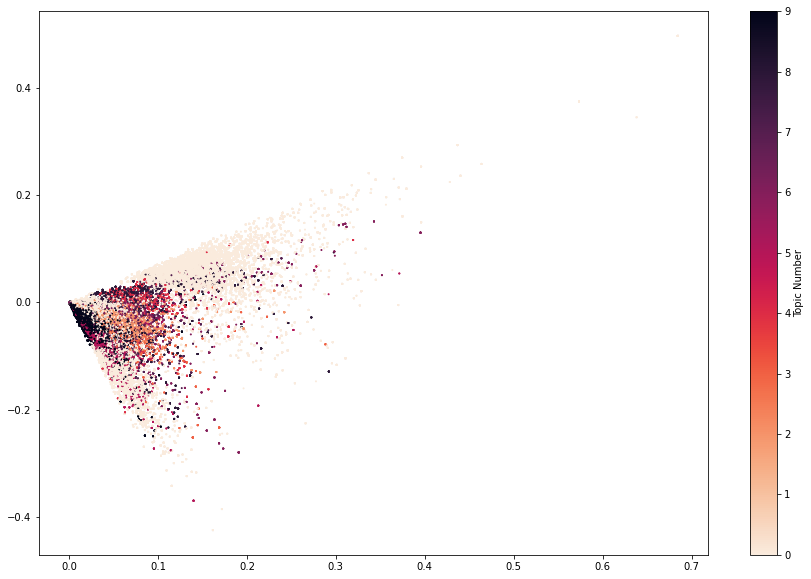

In [30]:
fig = plt.figure(figsize=(15,10))
plt.scatter(model[:, 0], model[:, 1], c=df['topic'], cmap='rocket_r', s=1)
plt.colorbar(ticks=range(10), cmap='rocket_r', alpha=0.5, label='Topic Number')
plt.show()

#### Dendrogram

This dendrogram represents the topics in the fitted LSA model and the topics are represented by the colors of the points.
The points are sorted in descending order of the distance between the points. The distance is measured by the cosine distance.
The cosine distance is a measure of similarity between two vectors. Only 100 points are shown in the dendrogram to make it easier to read.

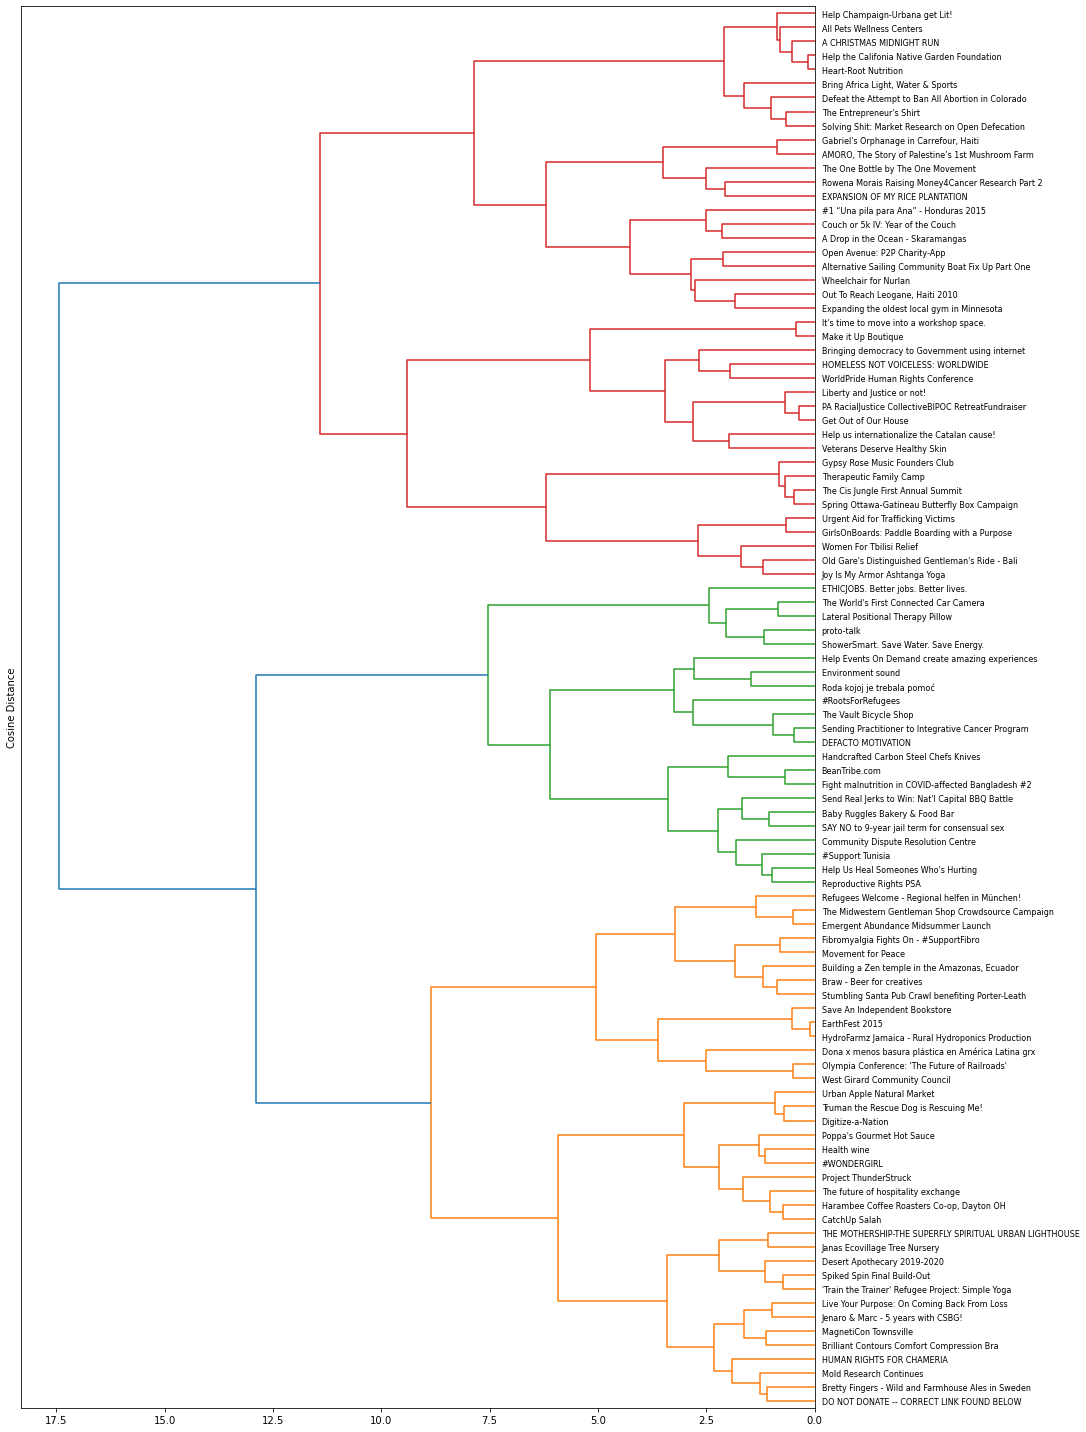

In [31]:
distance = 1 - cosine_similarity(model[100:200], model[100:200])
l = linkage(distance, method='ward')

fig, ax = plt.subplots(figsize=(15, 20))
dendrogram(l, labels=df['title'][100:200].values, leaf_font_size=8, orientation='left', distance_sort='descending')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.tight_layout()
plt.ylabel('Cosine Distance')
plt.show()

#### LDA

In [32]:
lda = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online',random_state=42)

model2 = lda.fit_transform(matrix)

In [33]:
for index, topic in enumerate(lsa.components_):
    print(f'TOPIC {index}\nTop 10 words: {[vectorize2.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]}\n')
    print('#############################################')

TOPIC 0
Top 10 words: ['help', 'need', 'world', 'make', 'fund', 'first', 'support', 'life', 'community', 'people']

#############################################
TOPIC 1
Top 10 words: ['help', 'need', 'fund', 'please', 'raise', 'build', 'homeless', 'refugee', 'haiti', 'continue']

#############################################
TOPIC 2
Top 10 words: ['support', 'community', 'life', 'people', 'love', 'local', 'music', 'project', 'food', 'space']

#############################################
TOPIC 3
Top 10 words: ['life', 'make', 'people', 'game', 'change', 'save', 'bring', 'time', 'story', 'better']

#############################################
TOPIC 4
Top 10 words: ['need', 'community', 'people', 'world', 'support', 'food', 'home', 'place', 'free', 'local']

#############################################
TOPIC 5
Top 10 words: ['game', 'need', 'make', 'card', 'support', 'board', 'play', 'player', 'adventure', 'based']

#############################################
TOPIC 6
Top 10 words: [

From the below scatter plot, we can see that the topics are more evenly distributed among the different categories.

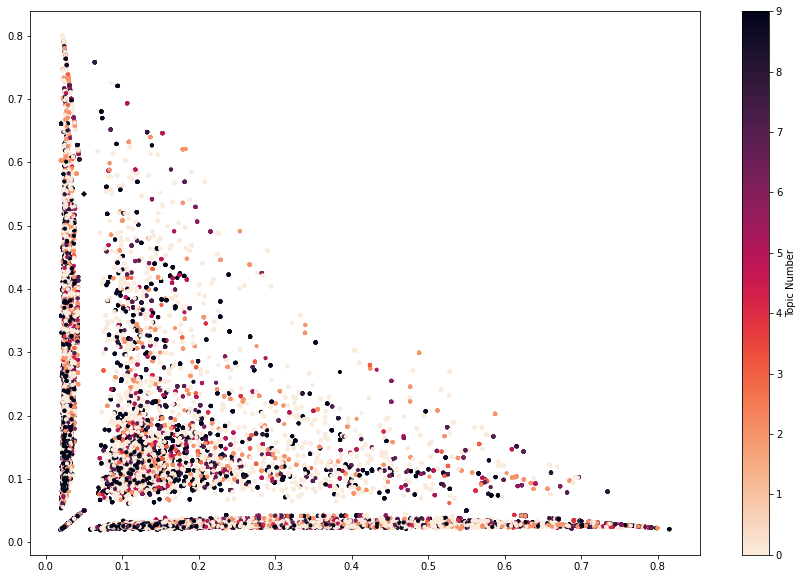

In [34]:
fig = plt.figure(figsize=(15,10))
plt.scatter(model2[:, 0], model2[:, 1], c=df['topic'], cmap='rocket_r', s=10)
plt.colorbar(ticks=range(10), cmap='rocket_r', alpha=0.5, label='Topic Number')
plt.show()

Comparing the results of LSA's Dendrogram with LDA, we can see that LDA is more clustered than LSA. The cosine distance is much lower for LDA and the clusters are more evenly distributed. Which means that LDA is more suitable for this task.

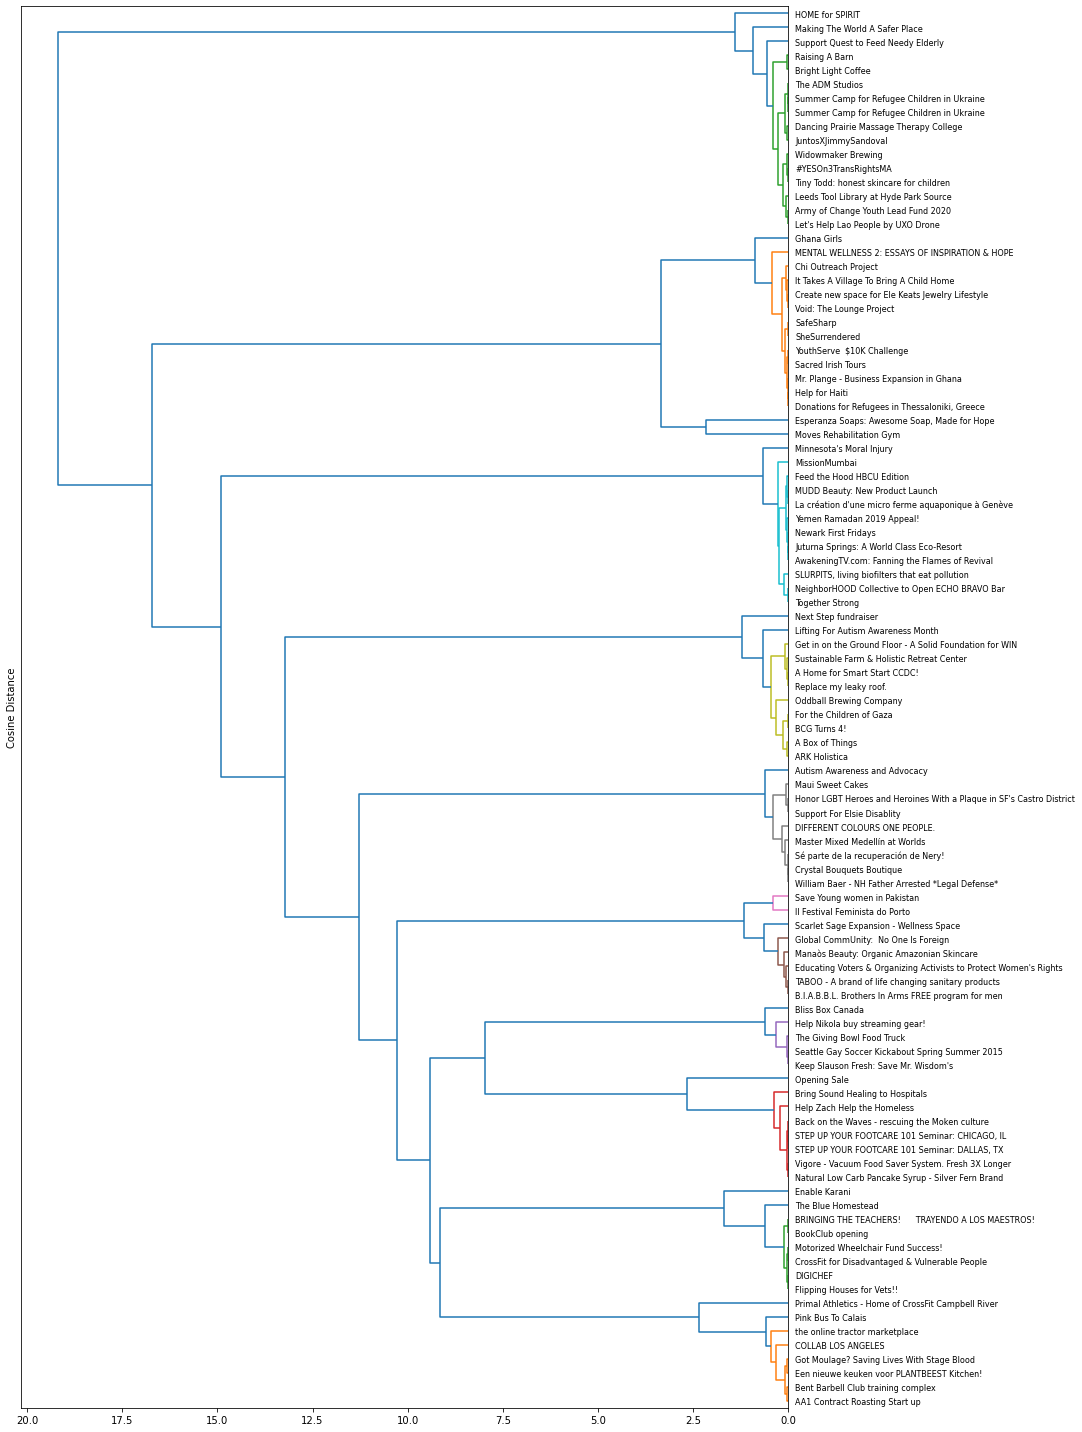

In [35]:
distance = 1 - cosine_similarity(model2[:100], model2[:100])
l = linkage(distance, method='ward')

fig, ax = plt.subplots(figsize=(15, 20))
dendrogram(l, labels=df['title'][:100].values, leaf_font_size=8, color_threshold=0.5, orientation='left', distance_sort='descending')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.tight_layout()
plt.ylabel('Cosine Distance')

plt.show()